In [31]:
import pandas as pd
from collections import defaultdict
from Operators.evaluation import *

In [32]:
fitness_path = "fitness_logs2"
summary_path = "ga_summary2.csv"

In [33]:
# Function to remove elitism=False from the name of the file 
# import os
# from pathlib import Path

# folder_path = Path(fitness_path)

# for file in folder_path.glob("*.csv"):
#     old_name = file.name
#     if "elitism=False" in old_name:
#         new_name = old_name.replace("elitism=False", "").strip()
#         new_path = file.with_name(new_name)
#         file.rename(new_path)
#         print(f"Renamed: {old_name} → {new_name}")


In [34]:
fitness_dfs = load_fitness_logs(fitness_path)

Loaded 50 configurations from 'fitness_logs2'


In [35]:
fitness_dfs.keys()

dict_keys(['POP=100 XO=0.5 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=50 XO=0.5 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=100 XO=0 mut_prob=0.3 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=50 XO=1 mut_prob=0.3 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=100 XO=0.5 mut_prob=5 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=100 XO=0.5 mut_prob=0 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=50 XO=0.5 mut_prob=9 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=50 XO=0 mut_prob=0 mutat

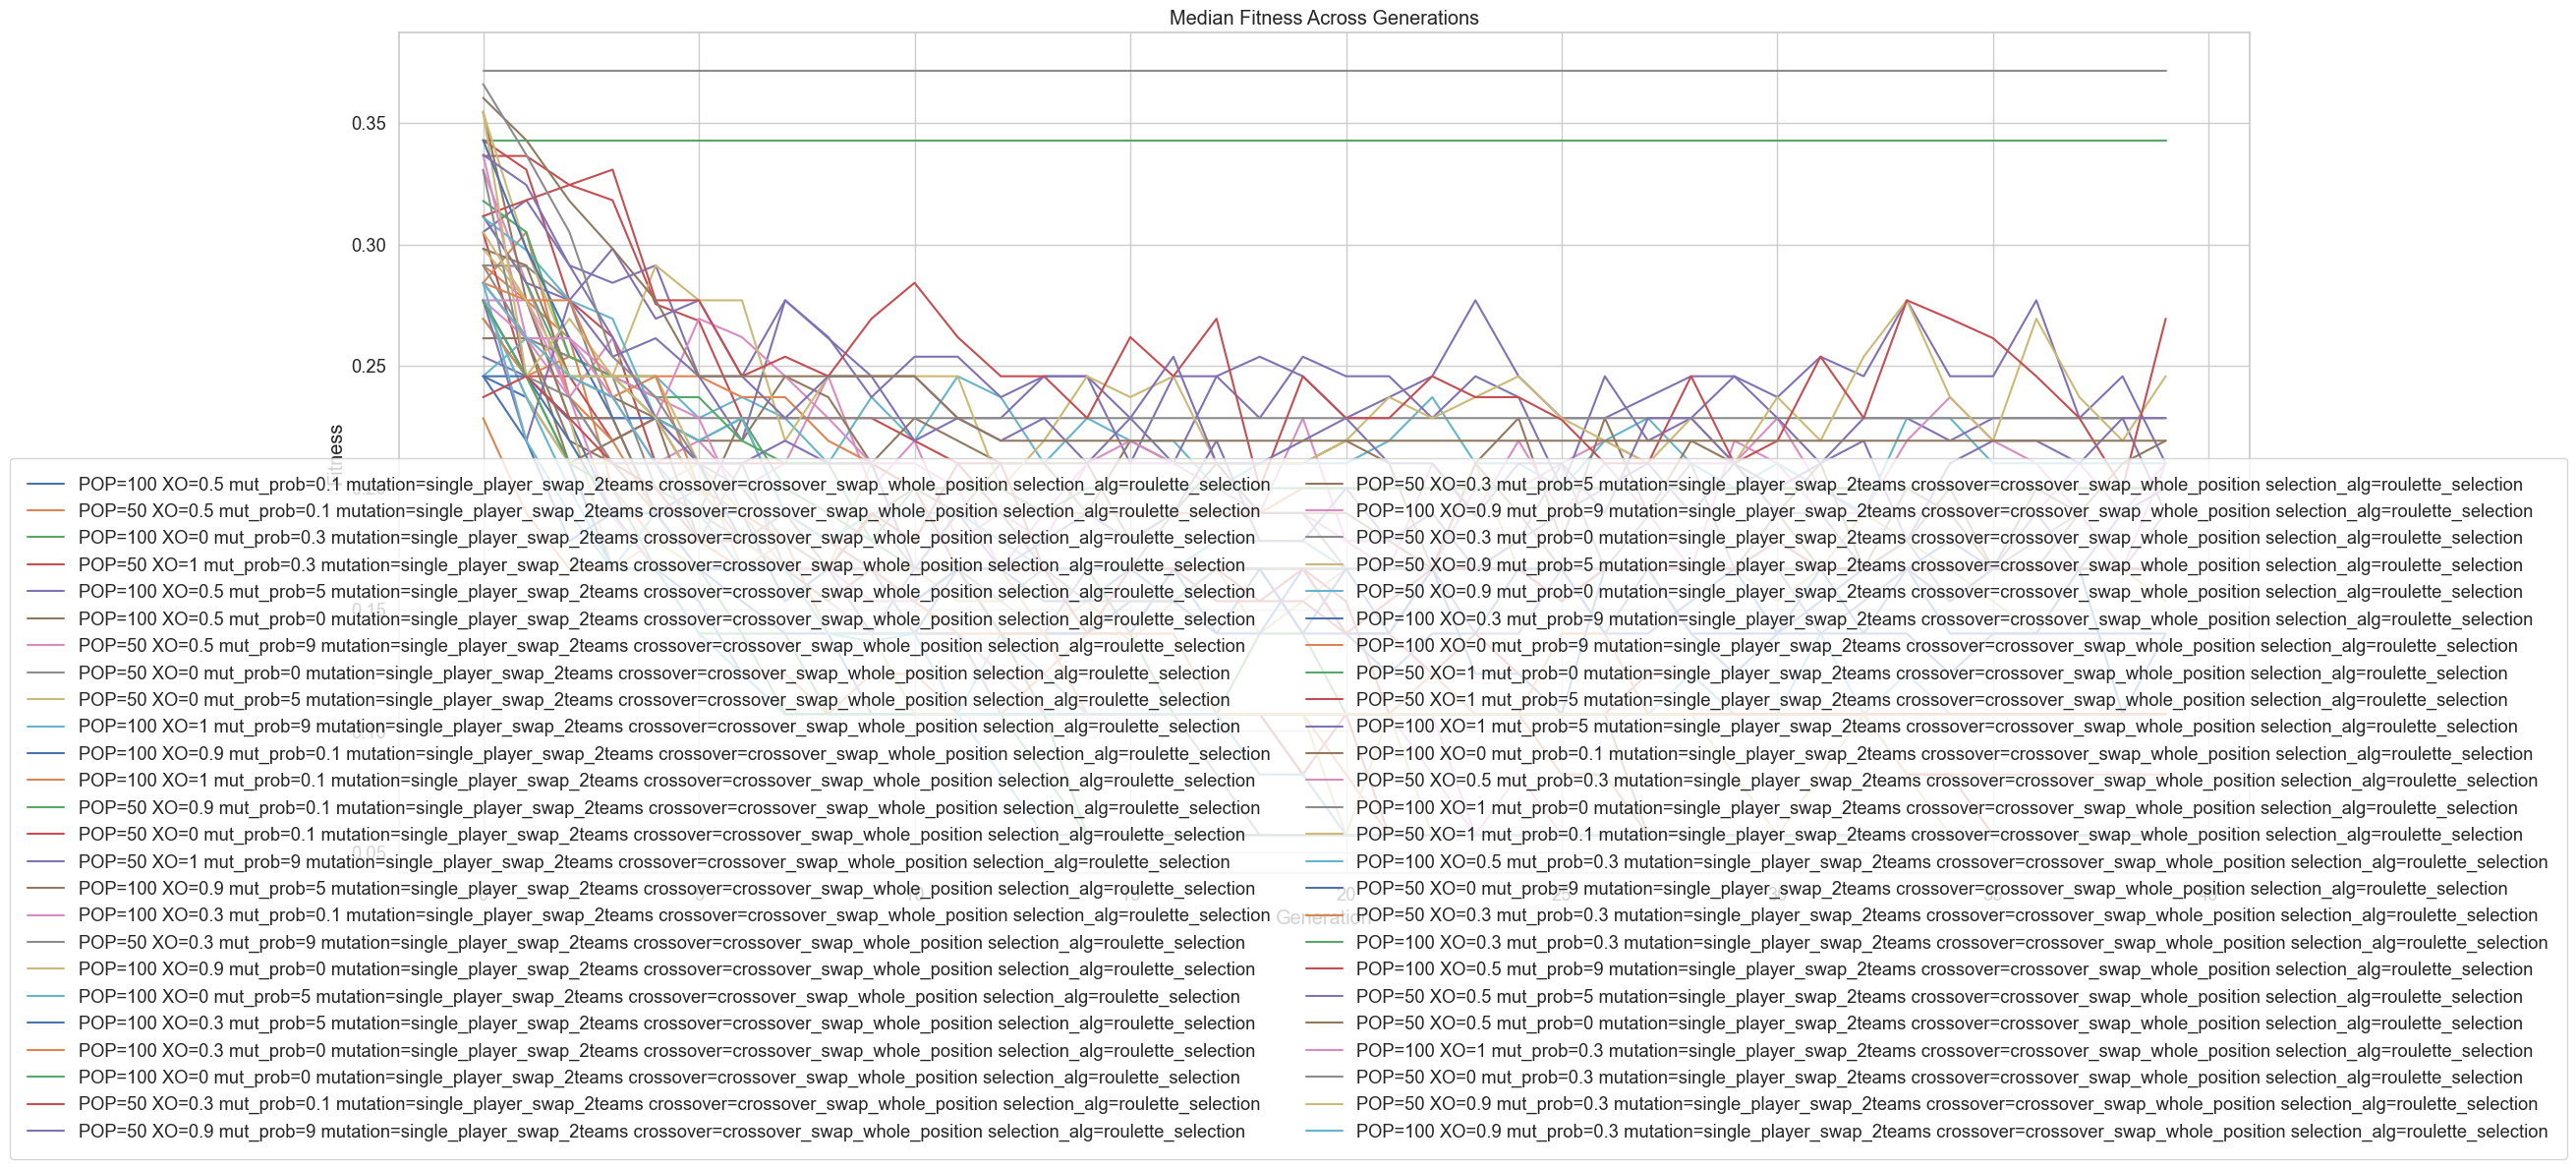

In [36]:
plot_median_fitness_over_gen(fitness_dfs)

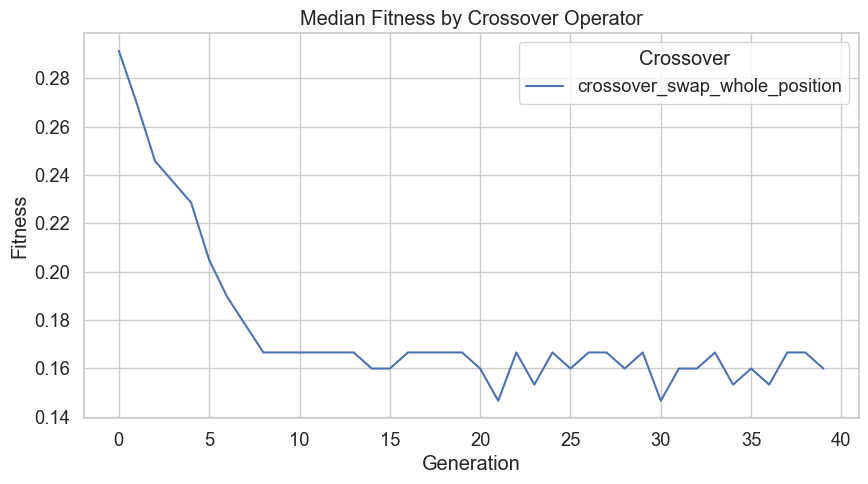

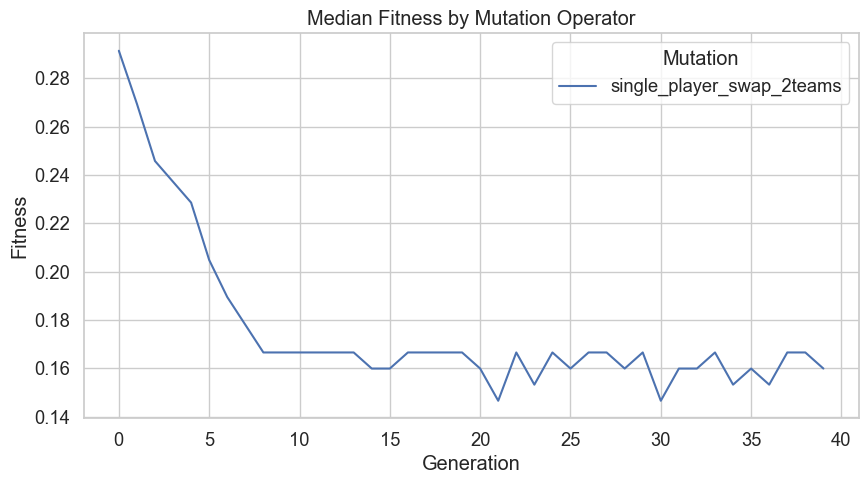

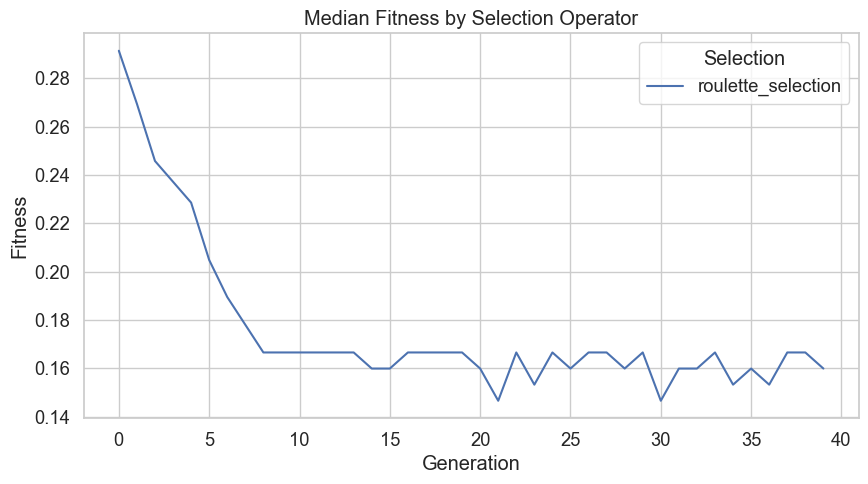

In [37]:
plot_median_fitness_by_operator(fitness_path)


## Statistical tests

#### The Friedman test, checks if there’s any significant difference across all configurations,
#### <br> If there are significant difference then  apply the Nemenyi post-hoc test, which compares each pair of configurations


 Friedman Test (non-parametric ANOVA for repeated measures)

Use when: You want to compare 3 or more configurations across repeated runs (e.g., different crossover strategies).

Assumption: Repeated measurements across same conditions.

Output: Tells you if there is a statistically significant difference somewhere in the group.


### Evaluating statistical significance across full hyperparameter configurations
Constraints:
* Same dataset: All configurations are tested on the same dataset
* Same number of runs: Each configuration must have the same number of runs (30)
* Same evaluation metric:  final fitness from each run

Null hypothesis (H₀): All configurations perform equally (no statistically significant difference in performance).

If p < 0.05: You can reject H₀ — at least one configuration performs significantly differently.

In [38]:
labels, results = run_friedman_test_on_best_fitness(fitness_dfs)


Friedman Test Results:
Test Statistic: 961.6046
P-value:        0.0000
Significant difference detected between configurations (reject H₀)


In [39]:
posthoc_results = run_posthoc_nemenyi_from_best_fitness(labels, results)


Post-hoc Nemenyi Test (p-values):
                                                    POP=100 XO=0.5 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection  \
POP=100 XO=0.5 mut_prob=0.1 mutation=single_pla...                                             1.0000                                                                                         
POP=50 XO=0.5 mut_prob=0.1 mutation=single_play...                                             0.9549                                                                                         
POP=100 XO=0 mut_prob=0.3 mutation=single_playe...                                             1.0000                                                                                         
POP=50 XO=1 mut_prob=0.3 mutation=single_player...                                             1.0000                                                                                         
POP=100 XO

/Users/juliakarpienia/Desktop/NOVA IMS /2nd sem/CIFO/CIFO_project_groupA/Operators/evaluation.py:352: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


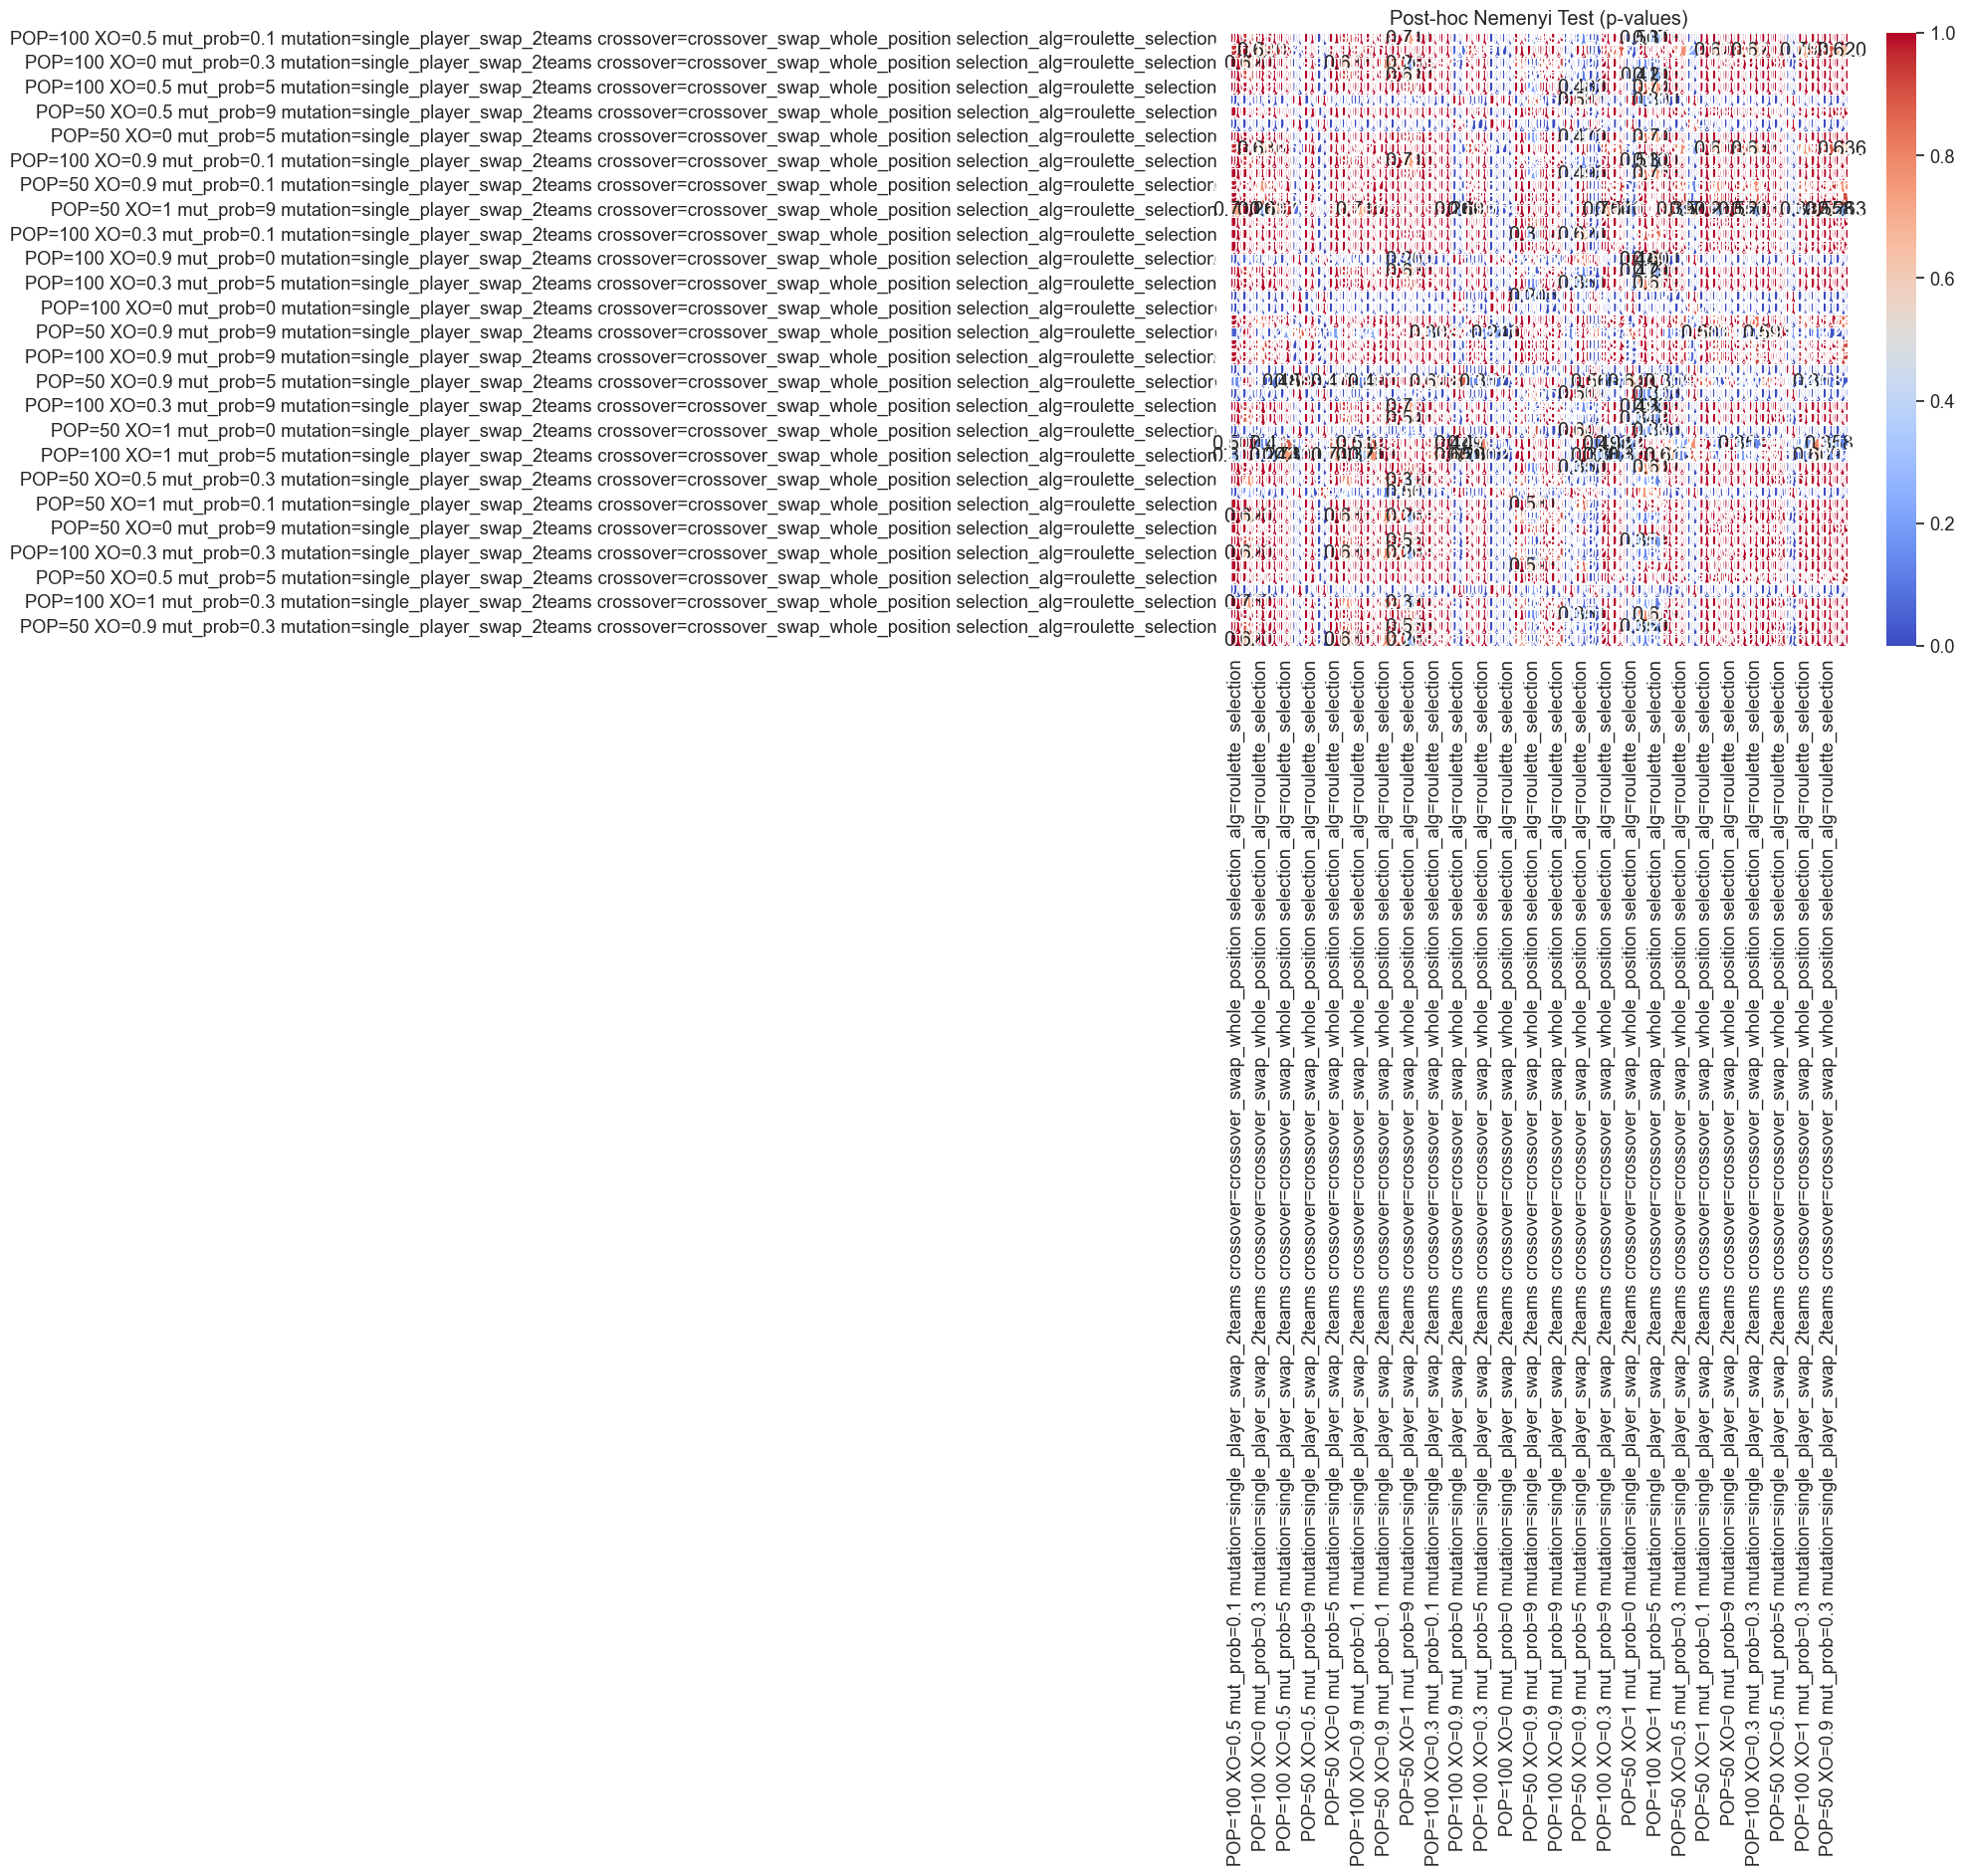

In [40]:
plot_posthoc_heatmap(posthoc_results)

In [41]:
summarize_significant_wins(posthoc_results)

Significant Wins
POP=100 XO=0 mut_prob=0 mutation=single_player_...                40
POP=50 XO=0 mut_prob=0 mutation=single_player_s...                40
POP=50 XO=0.3 mut_prob=0 mutation=single_player...                39
POP=50 XO=0.5 mut_prob=0 mutation=single_player...                38
POP=100 XO=0.3 mut_prob=0 mutation=single_playe...                38
POP=100 XO=0.5 mut_prob=0 mutation=single_playe...                35
POP=50 XO=0.9 mut_prob=0 mutation=single_player...                35
POP=50 XO=1 mut_prob=0 mutation=single_player_s...                35
POP=100 XO=0.9 mut_prob=0 mutation=single_playe...                33
POP=100 XO=1 mut_prob=0 mutation=single_player_...                28
POP=50 XO=0.9 mut_prob=9 mutation=single_player...                16
POP=50 XO=0.5 mut_prob=0.3 mutation=single_play...                12
POP=100 XO=0.9 mut_prob=0.3 mutation=single_pla...                12
POP=100 XO=0.3 mut_prob=0.3 mutation=single_pla...                12
POP=100 XO=1 mut_prob=0.3 mutation=single_playe...                12
POP=100 XO=0 mut_prob=0.3 mutation=single_playe...                12
POP=100 XO=0.5 mut_prob=0.3 mutation=single_pla...                12
POP=50 XO=0.3 mut_prob=0.3 mutation=single_play...                11
POP=100 XO=0 mut_prob=9 mutation=single_player_...                11
POP=100 XO=0.3 mut_prob=9 mutation=single_playe...                11
POP=50 XO=0.9 mut_prob=0.3 mutation=single_play...                11
POP=100 XO=0.5 mut_prob=0.1 mutation=single_pla...                11
POP=100 XO=0 mut_prob=5 mutation=single_player_...                11
POP=50 XO=1 mut_prob=0.3 mutation=single_player...                11
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                11
POP=100 XO=0.3 mut_prob=5 mutation=single_playe...                10
POP=50 XO=0.5 mut_prob=5 mutation=single_player...                10
POP=100 XO=1 mut_prob=0.1 mutation=single_playe...                10
POP=50 XO=0 mut_prob=9 mutation=single_player_s...                10
POP=100 XO=0 mut_prob=0.1 mutation=single_playe...                10
POP=50 XO=0 mut_prob=5 mutation=single_player_s...                10
POP=100 XO=0.5 mut_prob=9 mutation=single_playe...                10
POP=100 XO=0.9 mut_prob=5 mutation=single_playe...                10
POP=50 XO=0.5 mut_prob=9 mutation=single_player...                10
POP=100 XO=0.3 mut_prob=0.1 mutation=single_pla...                10
POP=100 XO=0.5 mut_prob=5 mutation=single_playe...                10
POP=50 XO=0.3 mut_prob=9 mutation=single_player...                10
POP=50 XO=0 mut_prob=0.3 mutation=single_player...                10
POP=50 XO=1 mut_prob=0.1 mutation=single_player...                10
POP=50 XO=0.9 mut_prob=0.1 mutation=single_play...                 9
POP=50 XO=0.3 mut_prob=0.1 mutation=single_play...                 9
POP=50 XO=0 mut_prob=0.1 mutation=single_player...                 9
POP=50 XO=0.9 mut_prob=5 mutation=single_player...                 9
POP=100 XO=0.9 mut_prob=9 mutation=single_playe...                 9
POP=50 XO=0.3 mut_prob=5 mutation=single_player...                 9
POP=100 XO=1 mut_prob=9 mutation=single_player_...                 8
POP=50 XO=0.5 mut_prob=0.1 mutation=single_play...                 8
POP=100 XO=1 mut_prob=5 mutation=single_player_...                 5
POP=50 XO=1 mut_prob=5 mutation=single_player_s...                 5
POP=50 XO=1 mut_prob=9 mutation=single_player_s...                 5

The table gives a ranking based not just on performance, but on statistical confidence:
<br> Higher "Significant Wins" → more robust evidence that this configuration is truly better across multiple comparisons.
<br> Helps avoid picking a config just because of random variation in performance.

Config 1: It significantly beat 8 other configurations (with p < 0.05 in the Nemenyi test),
This suggests it’s a strong candidate for the best hyperparameter setup.

| POP | XO Prob | Mut Prob | Significant Wins | Interpretation                                                                                                                                       |
| --- | ------- | -------- | ---------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| 50  | 0       | 0        | **40**           | Best config. Completely **no crossover or mutation**, but performed best across all. Indicates strong initial population or greedy selection effect. |
| 100 | 0       | 0        | **40**           | Tied with above, showing stability even at larger population.                                                                                        |
| 50  | 0.3     | 0        | 39               | Small crossover improves slightly but still **no mutation**.                                                                                         |
| 100 | 0.3     | 0        | 38               | Similar to above, indicating **crossover helps only marginally**.                                                                                    |
| 50  | 0.5     | 0        | 38               | Again, no mutation but moderate crossover.                                                                                                           |
| 50  | 1.0     | 0        | 35               | Full crossover doesn’t degrade performance. Still no mutation.                                                                                       |
| 100 | 0.5     | 0        | 35               | Same trend. Moderate crossover + no mutation maintains strong performance.                                                                           |


### Analyzing only the best-performing configurations from slim_summary.csv

Missing file: fitness_logs2/POP=50 XO=0.0 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection.csv
Missing file: fitness_logs2/POP=50 XO=1.0 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection.csv
Missing file: fitness_logs2/POP=50 XO=0.0 mut_prob=0.3 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection.csv
Missing file: fitness_logs2/POP=50 XO=1.0 mut_prob=0.3 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection.csv
Missing file: fitness_logs2/POP=100 XO=0.0 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection.csv
Missing file: fitness_logs2/POP=100 XO=1.0 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection.

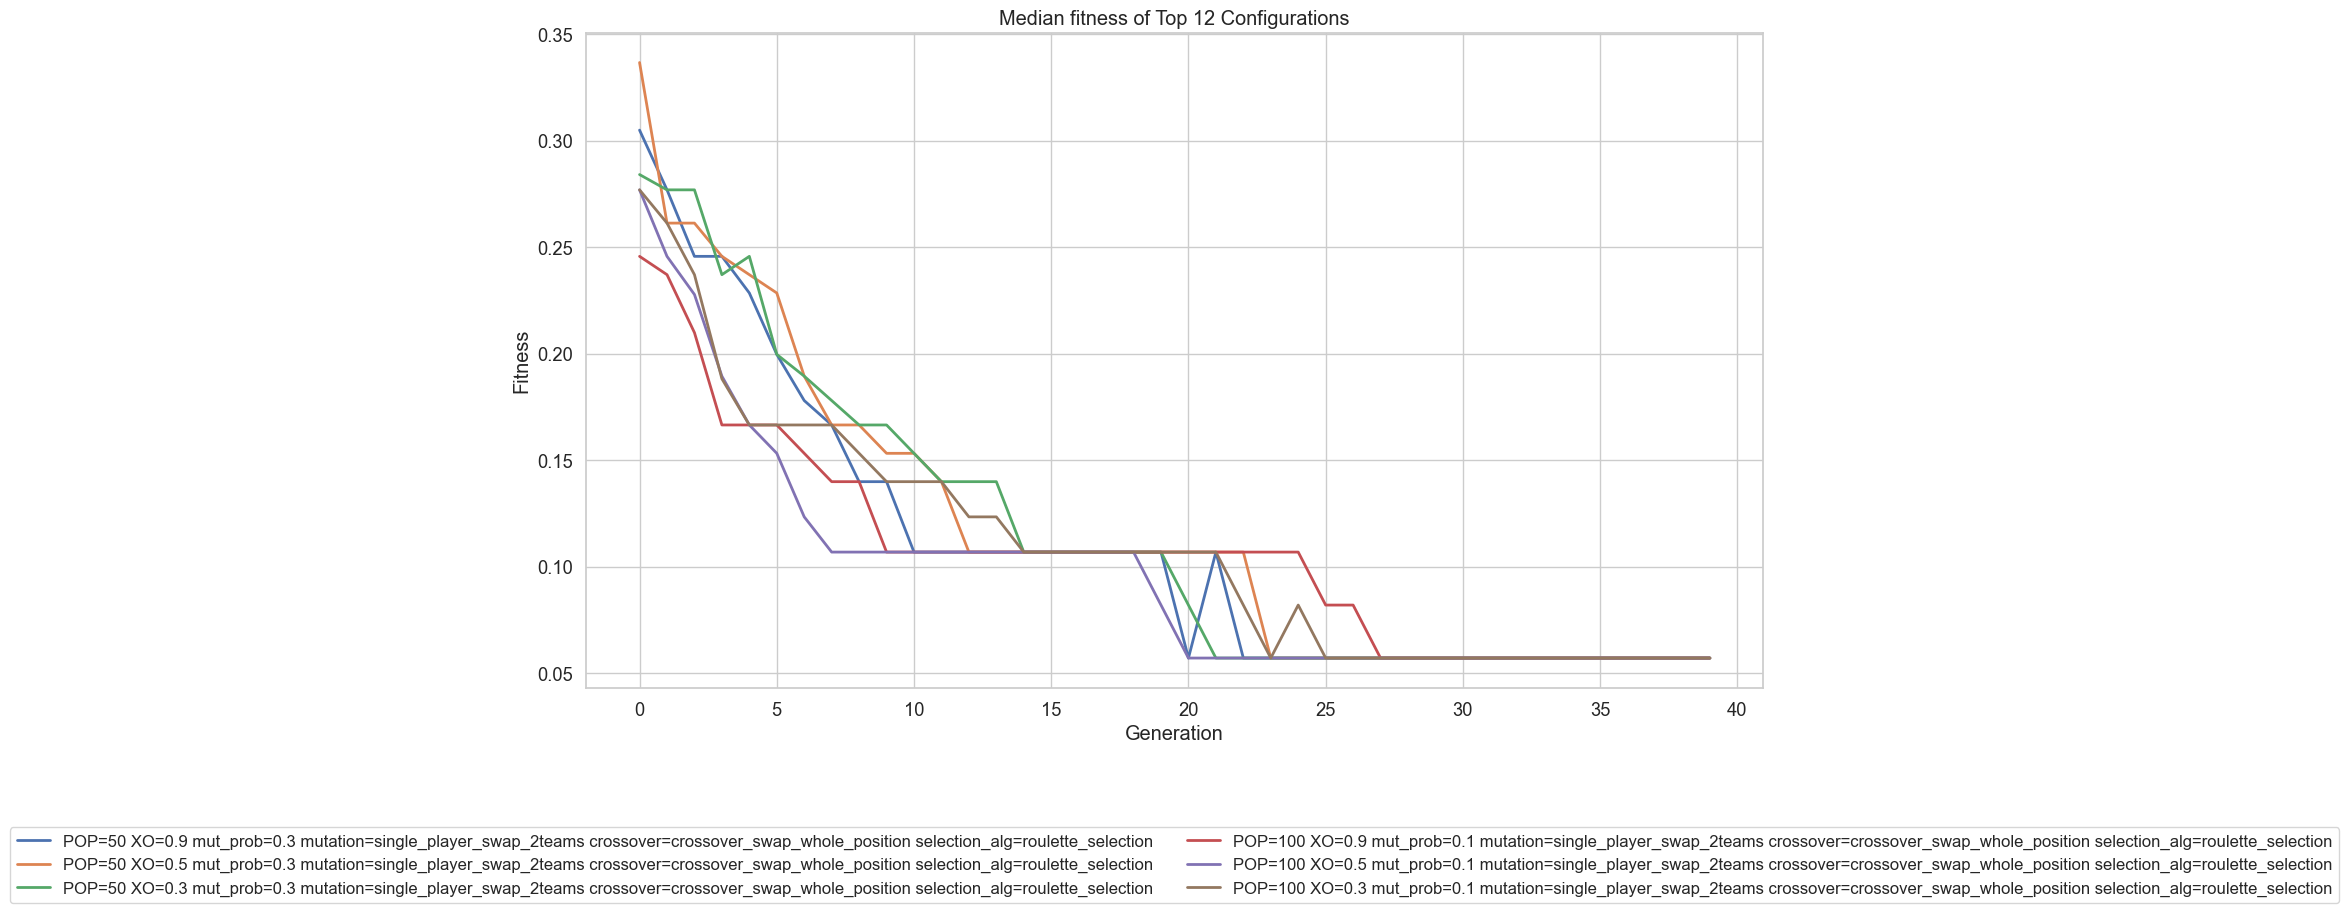

In [42]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=12, metric='median_fitness')

Missing file: fitness_logs2/POP=100 XO=0.0 mut_prob=0.3 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection.csv
Missing file: fitness_logs2/POP=100 XO=1.0 mut_prob=0.3 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection.csv


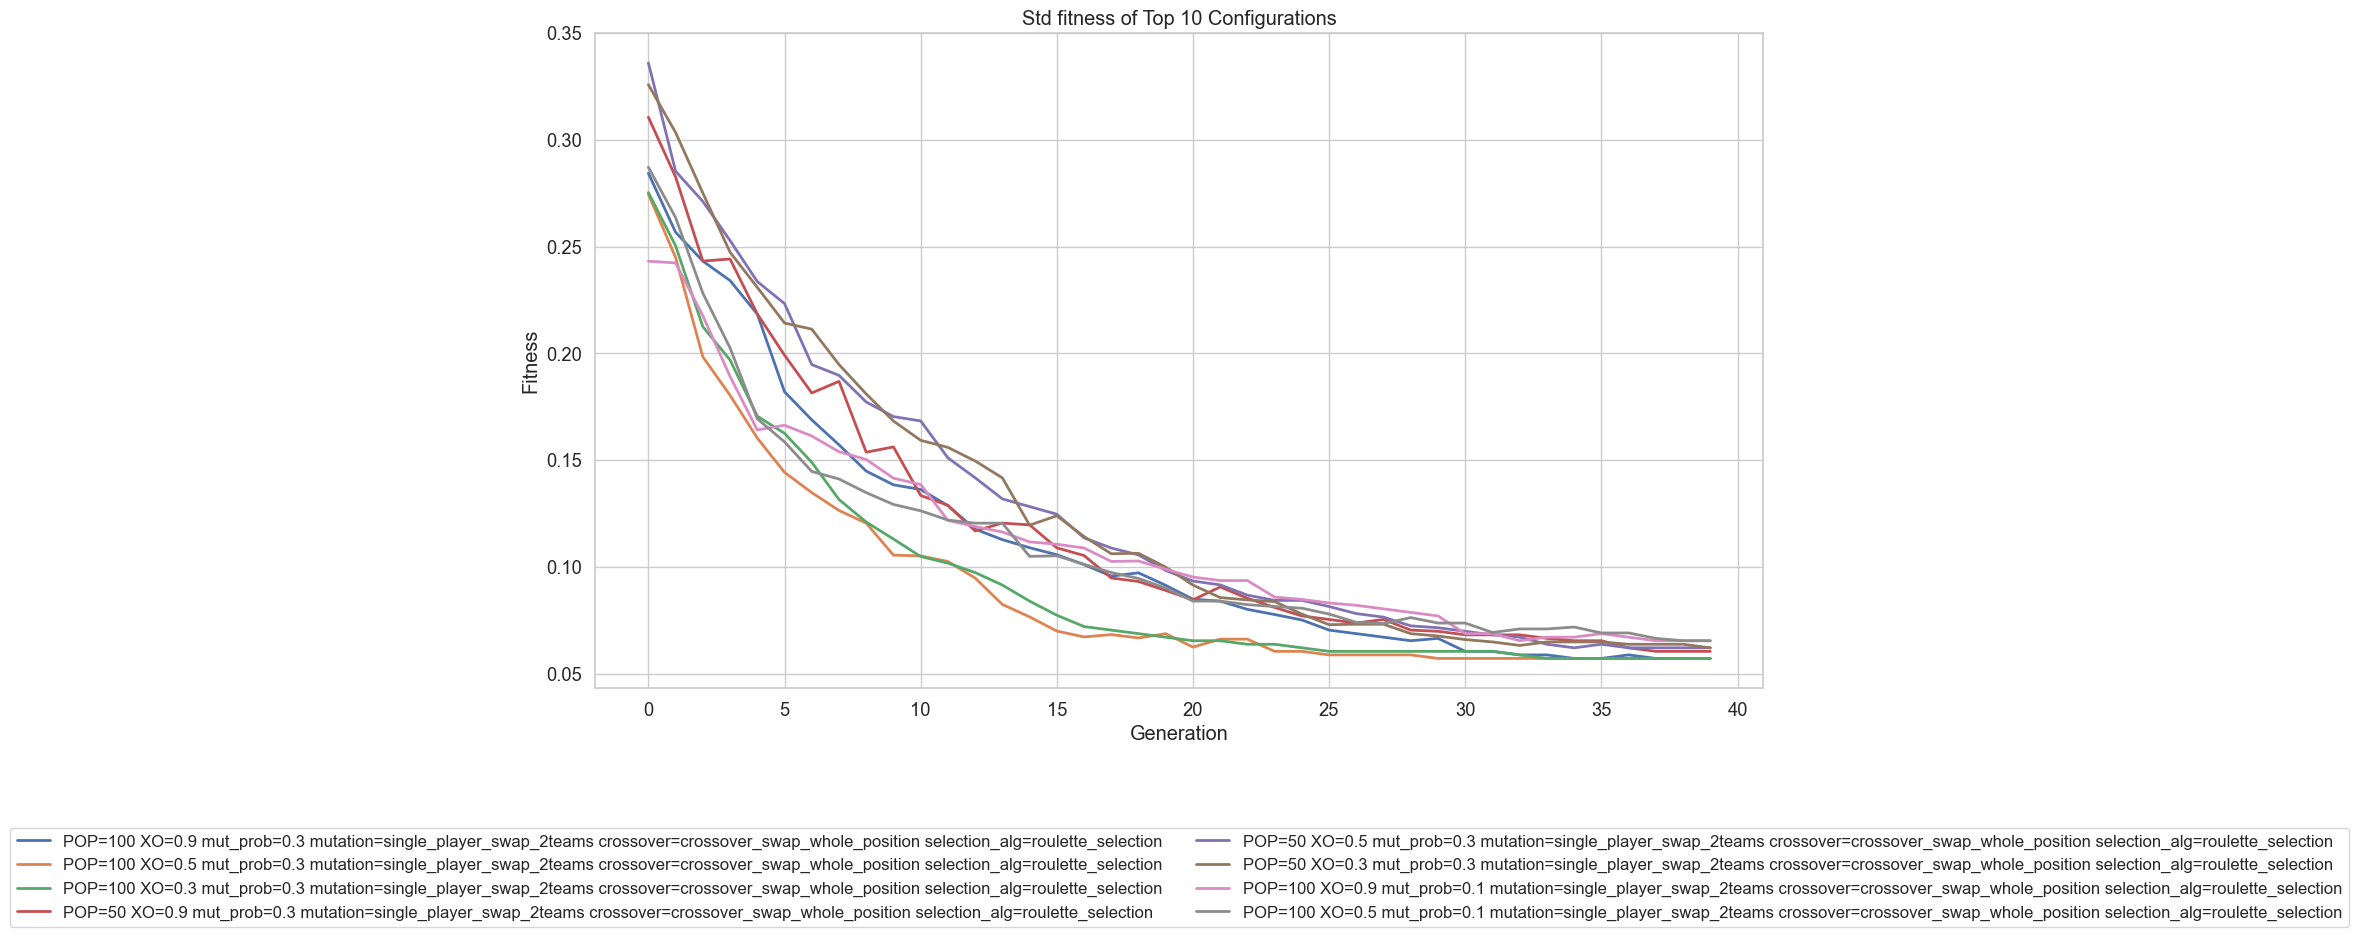

In [43]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=10, metric="std_fitness")

/Users/juliakarpienia/Desktop/NOVA IMS /2nd sem/CIFO/CIFO_project_groupA/Operators/evaluation.py:213: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


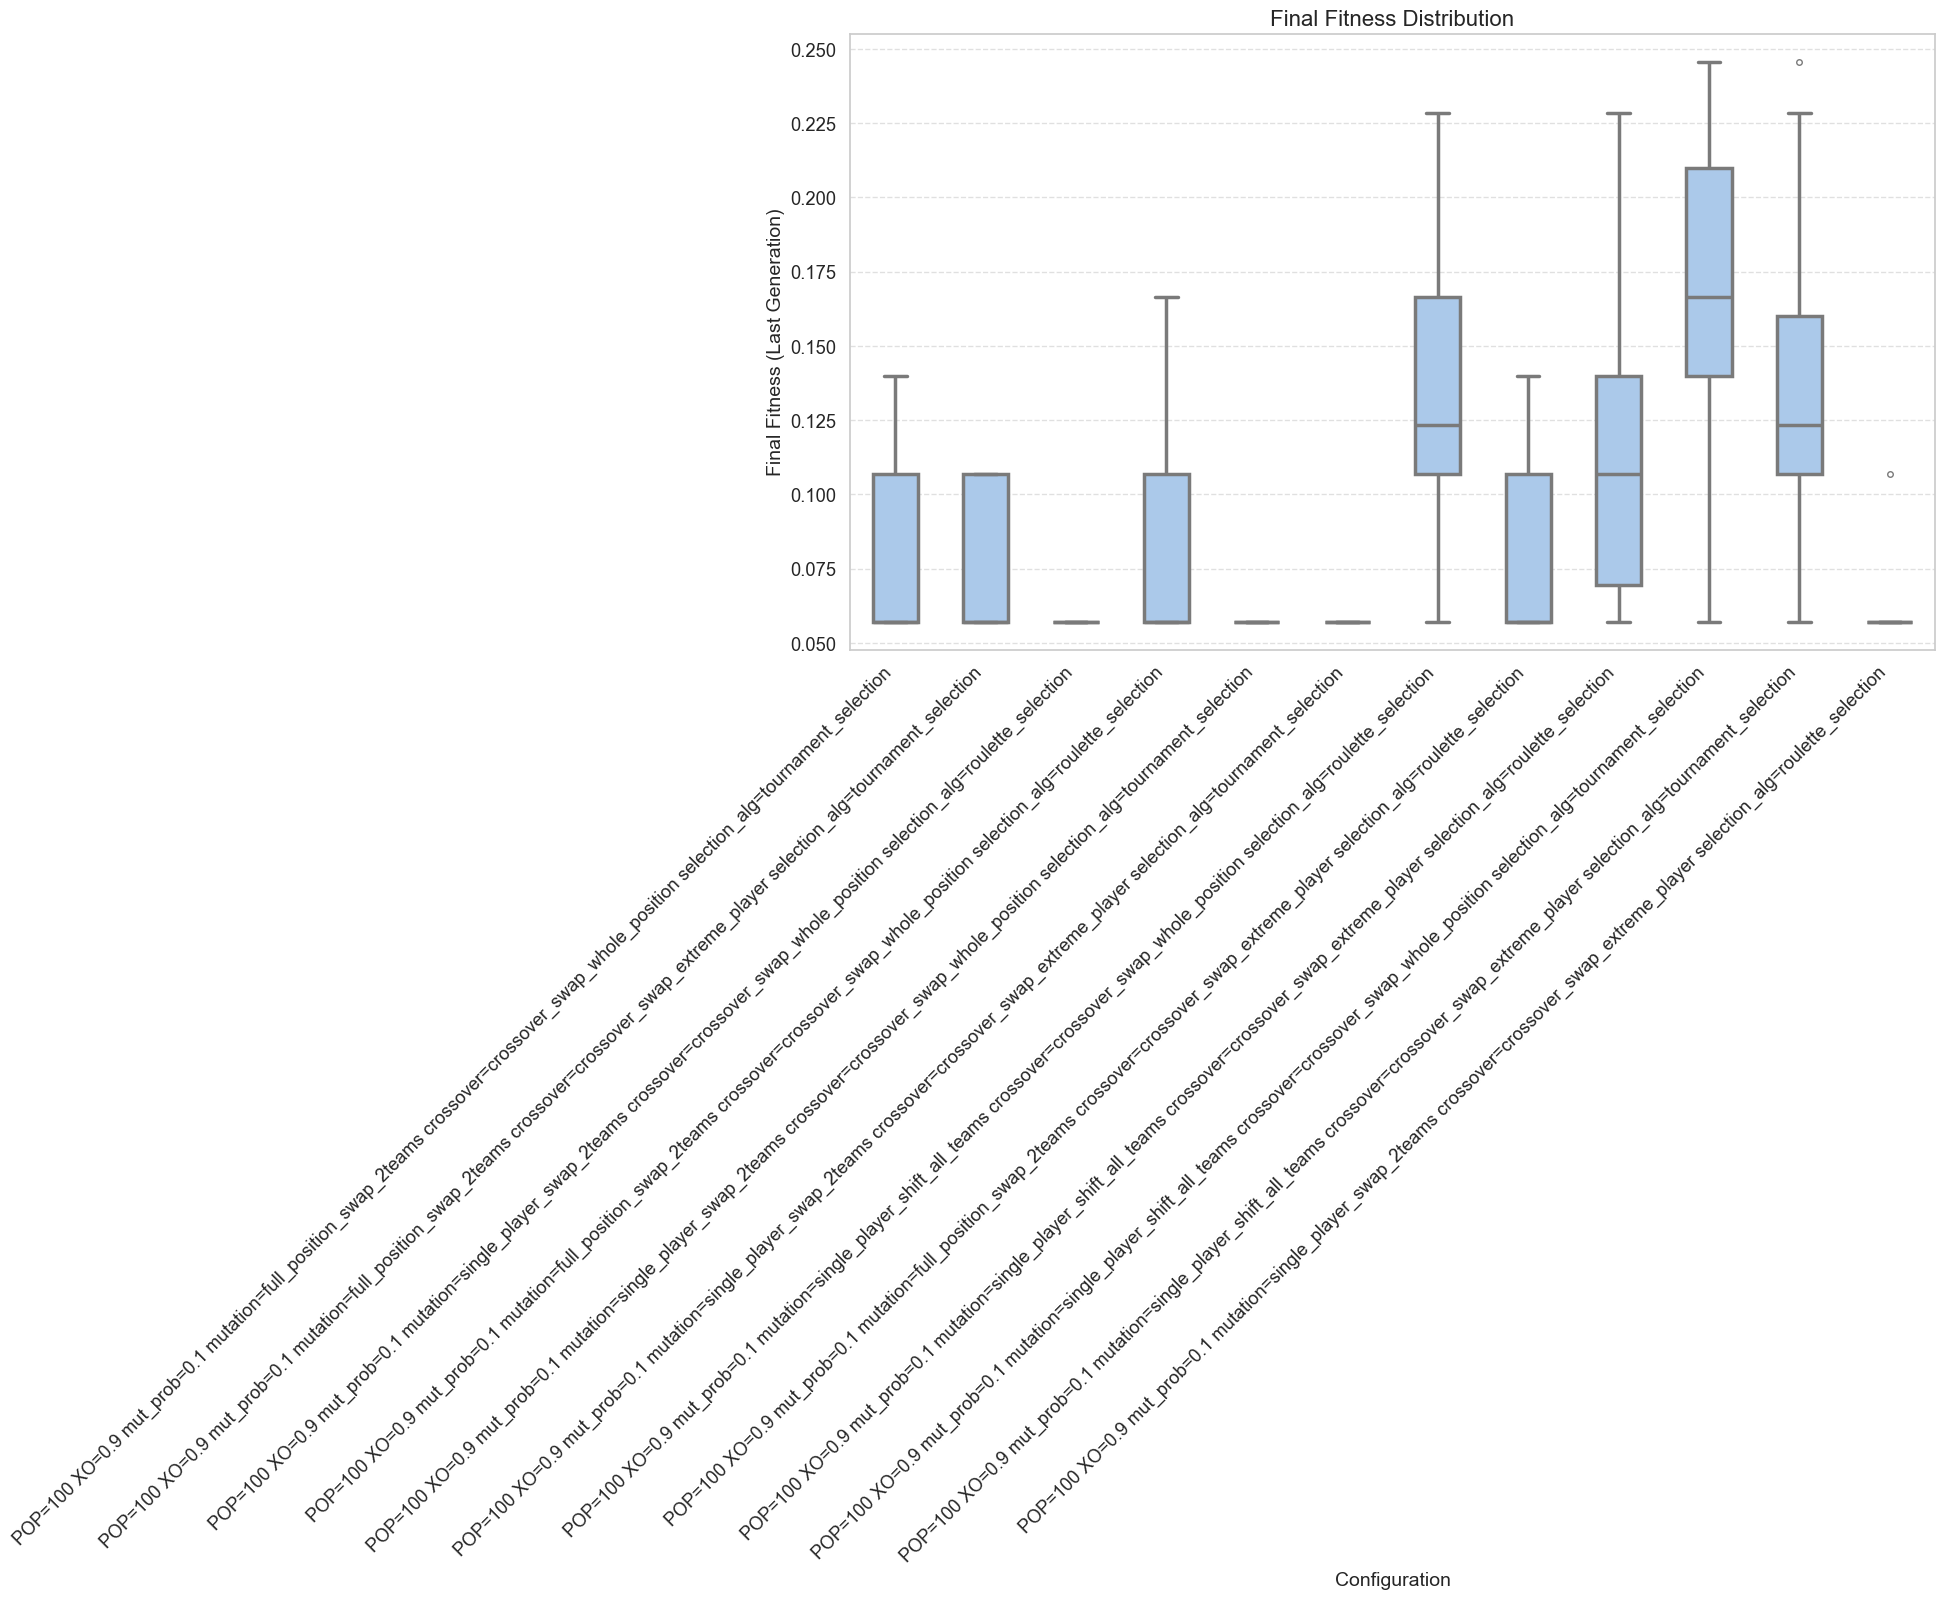

In [44]:
plot_final_fitness_boxplot()


/Users/juliakarpienia/Desktop/NOVA IMS /2nd sem/CIFO/CIFO_project_groupA/Operators/evaluation.py:250: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


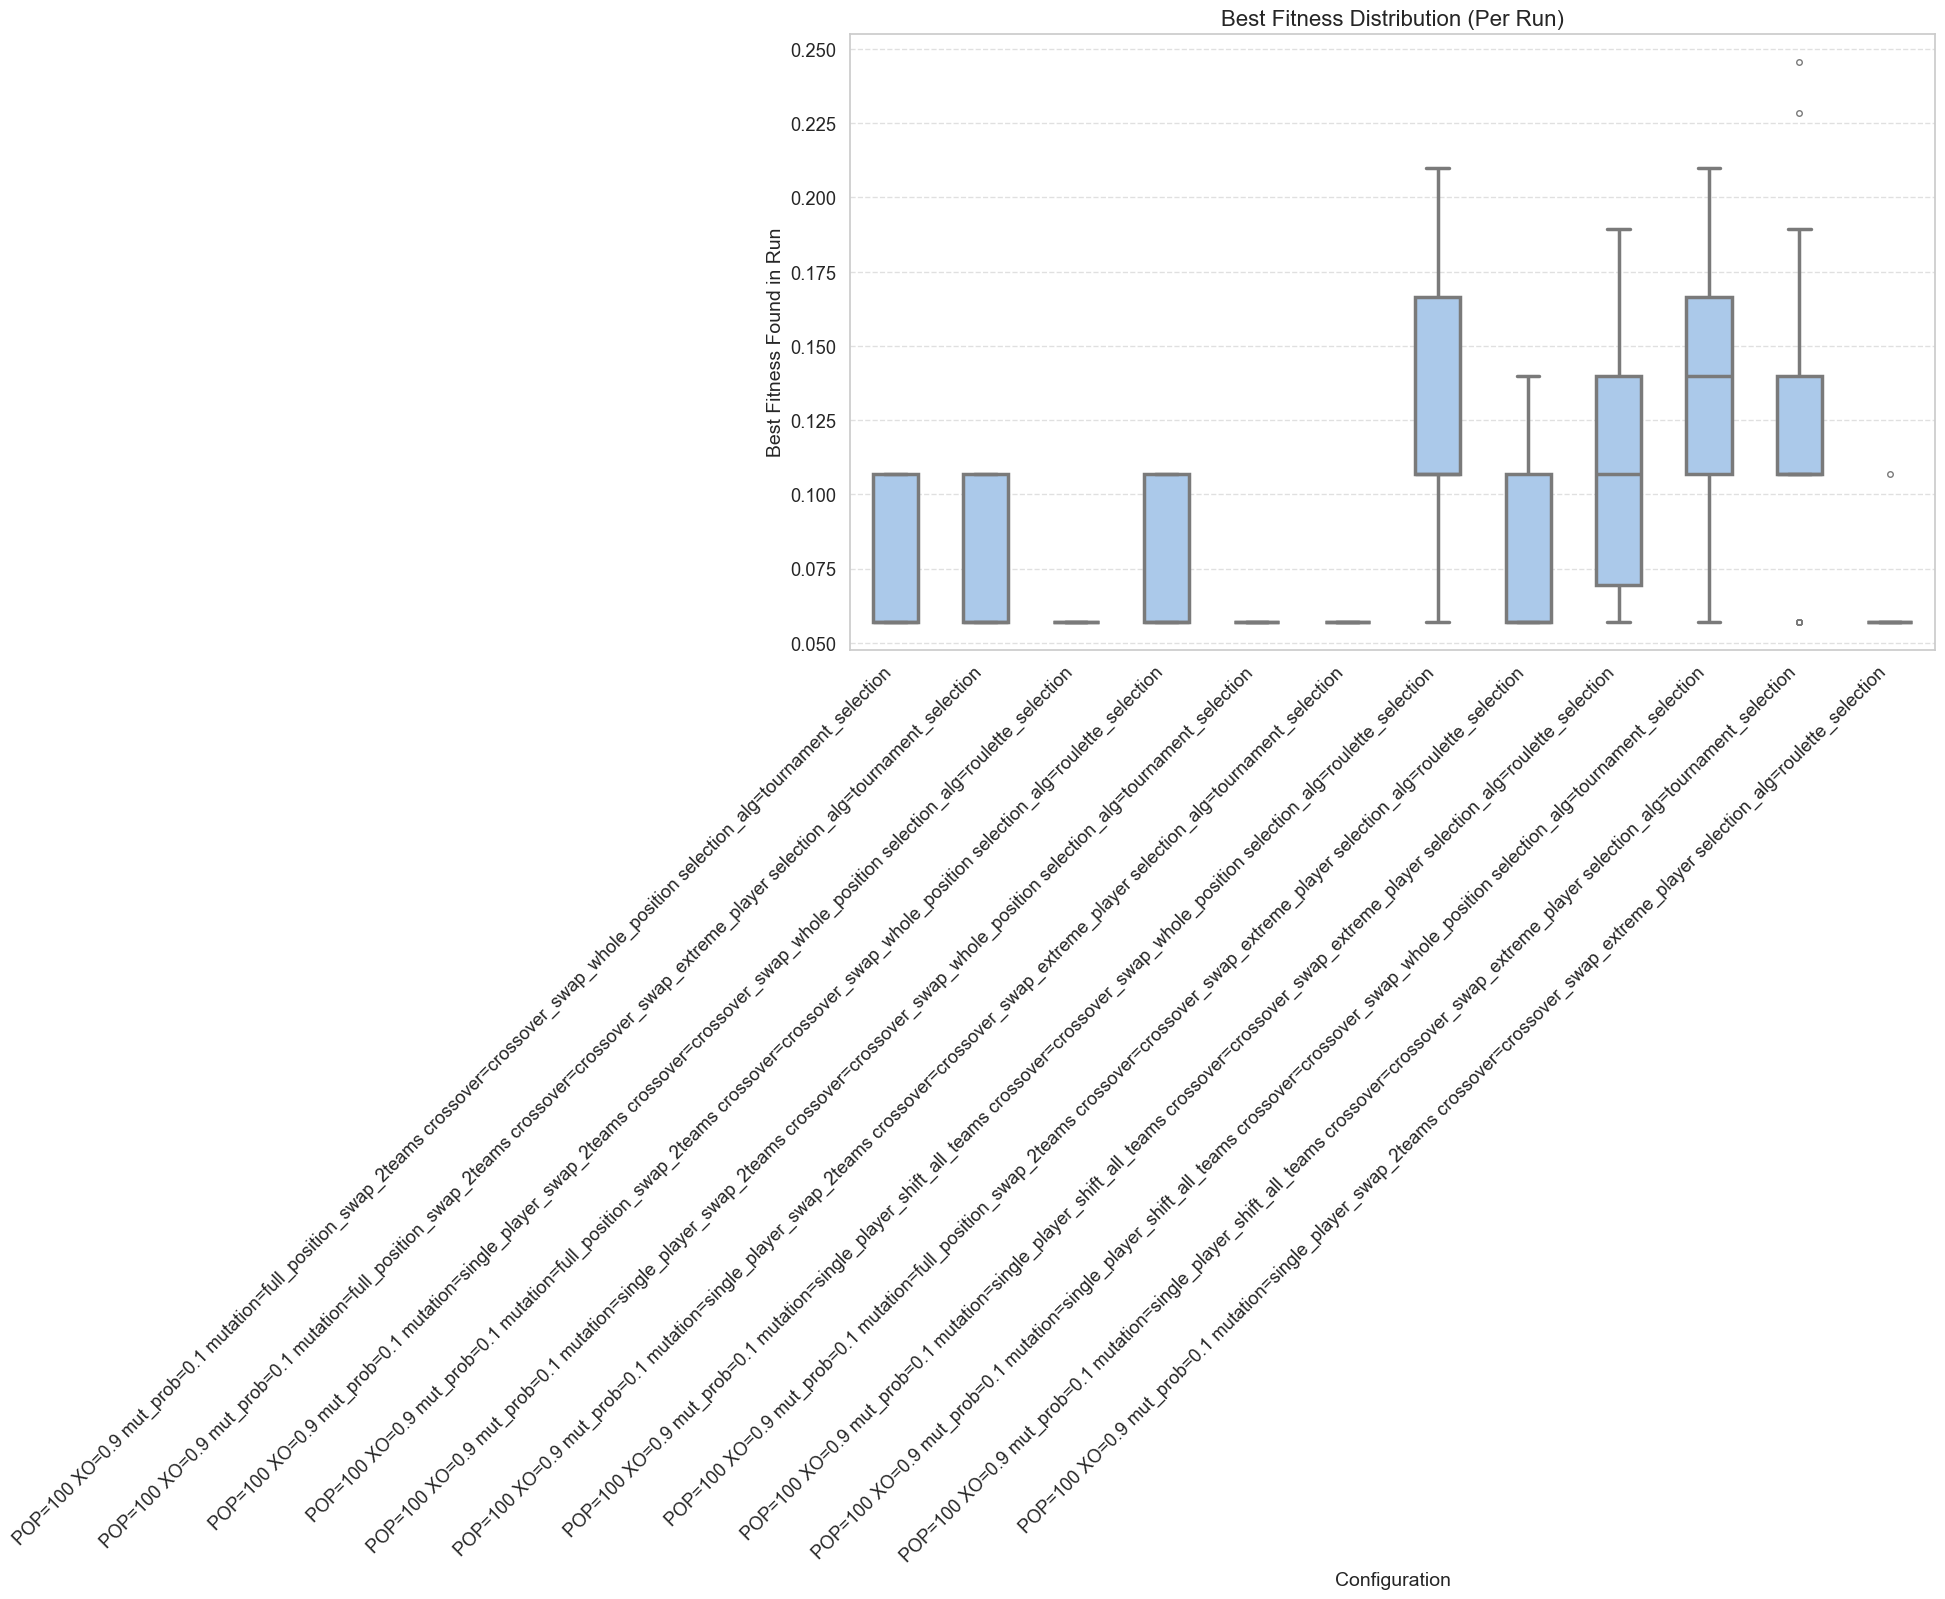

In [45]:
plot_best_fitness_boxplot()